### Import Data dan Library

In [1]:
from google.colab import files
 
 
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [123]:
import pandas as pd
import io


import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy import bartlett
%matplotlib inline


 
df = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))
print(df)
round(df.describe(),2)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


### Langkah 1 : Analisa Descriptive Statistics

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


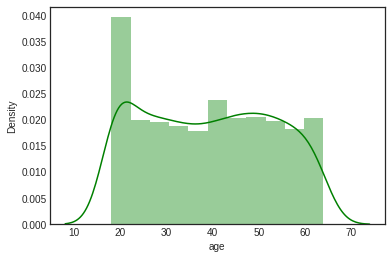

Grafik distribusi usia memiliki tipe uniform


In [98]:
#Buat grafik distribusi Umur, Charges,sama BMI

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.distplot(df["age"],color="Green");
plt.show()
print('Grafik distribusi usia memiliki tipe uniform')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


grafik distribusi Charges adalah skewed positif


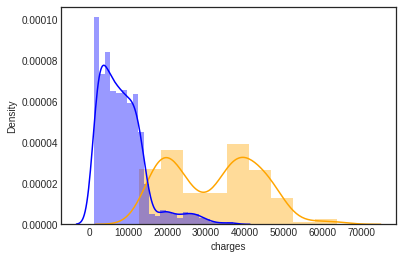

In [100]:
data_charges = df['charges']
chg_rokok =sns.distplot(df[df.smoker == 'yes']["charges"],color="orange")
chg_non_rokok =sns.distplot(df[df.smoker == 'no']["charges"],color="blue")

print("grafik distribusi Charges adalah skewed positif")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


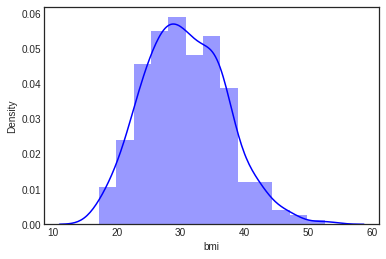

grafik distribusi BMI perokok adalah normal


In [159]:
data_bmi = df['bmi']
sns.distplot(df[df.smoker == 'yes']["bmi"],color="Blue");
plt.show()

print("grafik distribusi BMI perokok adalah normal")

In [23]:
#Rata-rata Umur Pengguna:

rata_age = df['age'].mean()
print(f"Rata-rata umur pengguna adalah dengan rumus rata-rata  : {rata_age:.2f} Tahun")


Rata-rata umur pengguna adalah dengan rumus rata-rata  : 39.21 Tahun


In [160]:
#Rata-rata BMI Pengguna yang merokok
rata_age_rokok = df[df.smoker == 'yes']['bmi'].mean()
print(f"Rata-rata BMI Pengguna yang merokok : {rata_age_rokok:.2f}")

Rata-rata BMI Pengguna yang merokok : 30.71


In [36]:
#Apakah variansi dari data charges perokok dan non perokok sama?

print(f"varian charges yang merokok : {11541.55*2:.2f}")
print(f"varian charges yang tidak merokok : {5993.78*2:.2f}")
print("")
print("variansi dari data charges perokok dan non perokok bebeda")
round(df['charges'].groupby(df['smoker']).describe().T,2)

varian charges yang merokok : 23083.10
varian charges yang tidak merokok : 11987.56

variansi dari data charges perokok dan non perokok bebeda


smoker,no,yes
count,1064.00,274.00
mean,8434.27,32050.23
std,5993.78,11541.55
min,1121.87,12829.46
25%,3986.44,20826.24
50%,7345.41,34456.35
75%,11362.89,41019.21
max,36910.61,63770.43


In [62]:
#Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
print("Secara rata-rata umur perempuan dan laki-laki yang merokok sama di sekitar 38 tahun")
round(df['age'].where(df['smoker']=='yes').groupby(df['sex']).describe().T,2)

Secara rata-rata umur perempuan dan laki-laki yang merokok sama di sekitar 38 tahun


sex,female,male
count,115.00,159.00
mean,38.61,38.45
std,14.22,13.75
min,18.00,18.00
25%,26.50,27.00
50%,39.00,38.00
75%,48.50,49.50
max,64.00,64.00


In [65]:
#Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
print(f"rata-rata tagihan perokok lebih tinggi {32050.23/8434.27:.2f} kali dibanding bukan perokok")
round(df['charges'].groupby(df['smoker']).describe().T,2)

rata-rata tagihan perokok lebih tinggi 3.80 kali dibanding bukan perokok


smoker,no,yes
count,1064.00,274.00
mean,8434.27,32050.23
std,5993.78,11541.55
min,1121.87,12829.46
25%,3986.44,20826.24
50%,7345.41,34456.35
75%,11362.89,41019.21
max,36910.61,63770.43


In [67]:
#Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25
#charges BMI >25
chg_bmi25 = df['charges'].where(df['bmi'] > 25).groupby(df['smoker']).describe()
print(f"rata-rata tagihan orang dengan BMI > 25 untuk perokok {35116.91/8629.59:.2f} kali dibanding bukan perokok")
round(chg_bmi25.T,2)

# round(df['chg_bmi25'].groupby(df['smoker']).describe().T,2)

rata-rata tagihan orang dengan BMI > 25 untuk perokok 4.07 kali dibanding bukan perokok


smoker,no,yes
count,872.00,219.00
mean,8629.59,35116.91
std,6040.55,10702.56
min,1131.51,15518.18
25%,4236.58,24601.56
50%,7580.90,37270.15
75%,11462.12,42808.67
max,36910.61,63770.43


In [68]:
#BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?
round(df['bmi'].groupby(df['sex']).describe().T,2)

sex,female,male
count,662.00,676.00
mean,30.38,30.94
std,6.05,6.14
min,16.82,15.96
25%,26.12,26.41
50%,30.11,30.69
75%,34.31,34.99
max,48.07,53.13


In [13]:
#BMI mana yang lebih tinggi, seseorang perokok atau non perokok?
round(df['bmi'].groupby(df['smoker']).describe().T,2)

smoker,no,yes
count,1064.00,274.00
mean,30.65,30.71
std,6.04,6.32
min,15.96,17.20
25%,26.32,26.08
50%,30.35,30.45
75%,34.43,35.20
max,53.13,52.58


### Langkah 2 : Analisa Variabel Kategorik (PMF)

In [ ]:
#Gender mana yang memiliki tagihan paling tinggi?
df.loc[df['charges'].idxmax()]

age                  54
sex              female
bmi               47.41
children              0
smoker              yes
region        southeast
charges     63770.42801
Name: 543, dtype: object

In [ ]:
#Distribusi peluang tagihan di tiap-tiap region
#Buat Histogram Distribusi tiap2 region


           Count  Percentage
region                      
northeast    324    0.242152
northwest    325    0.242900
southeast    364    0.272048
southwest    325    0.242900


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


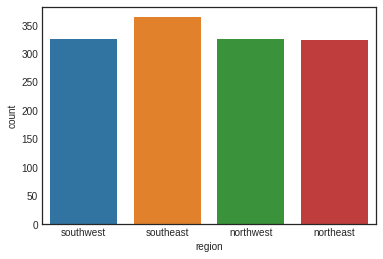

In [86]:
# Apakah setiap region memiliki proporsi data banyak orang yang sama?
sns.countplot(df['region'])
print(pd.DataFrame({'Count':df.groupby('region').size(),'Percentage': df.groupby('region').size() / len(df)}))

        Count  Percentage
smoker                   
no       1064    0.795217
yes       274    0.204783


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


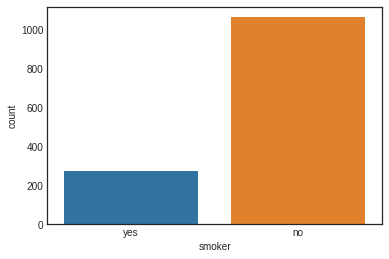

In [87]:
#Mana yang lebih tinggi proporsi perokok atau non perokok?
sns.countplot(df['smoker'])
print(pd.DataFrame({'Count':df.groupby('smoker').size(),'Percentage': df.groupby('smoker').size() / len(df)}))

In [88]:
#Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
#membuat tabel  kontigensi
print(pd.crosstab(index=df['smoker'], columns=df['sex']))

#Event A adalah perempuan
#Event B adalah perokok

A = 547 + 115
B = 115 + 159
A_B = 115
print(f"")
print(f"Jumlah ruang sampel orang merokok  : {B} ")
print(f"Jumlah event permpuan yang merokok  : {A_B} ")
print(f"peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok  : {A_B/B:.2f} ")

sex     female  male
smoker              
no         547   517
yes        115   159

Jumlah ruang sampel orang merokok  : 274 
Jumlah event permpuan yang merokok  : 115 
peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok  : 0.42 


In [90]:
# Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
#membuat tabel  kontigensi
print(pd.crosstab(index=df['smoker'], columns=df['sex']))

#Event C adalah laki-laki
#Event B adalah perokok

C = 517 + 159
B = 115 + 159
A_C = 159
print(f"")
print(f"Jumlah ruang sampel orang merokok  : {B} ")
print(f"Jumlah event lelaki yang merokok  : {A_C} ")
print(f"peluang seseorang tersebut adalah laki diketahui dia adalah perokok  : {A_C/B:.2f} ")

sex     female  male
smoker              
no         547   517
yes        115   159

Jumlah ruang sampel orang merokok  : 274 
Jumlah event lelaki yang merokok  : 159 
peluang seseorang tersebut adalah laki diketahui dia adalah perokok  : 0.58 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


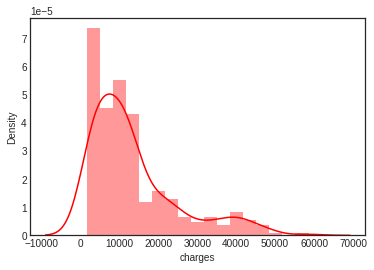

In [79]:
#Bagaimana bentuk distribusi tagihan dari tiap-tiap region?
sns.distplot(df[df.region == 'northeast']["charges"],color="red");
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


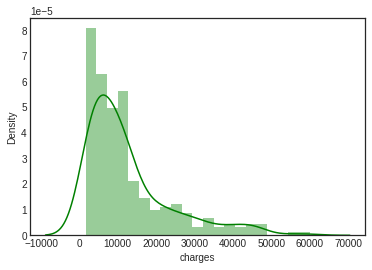

In [80]:
sns.distplot(df[df.region == 'northwest']["charges"],color="green");
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


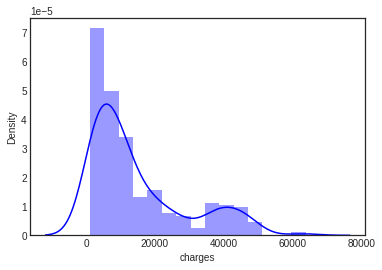

In [82]:
sns.distplot(df[df.region == 'southeast']["charges"],color="blue");
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


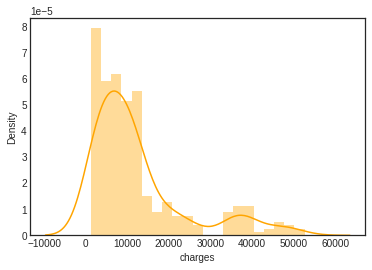

In [85]:
sns.distplot(df[df.region == 'southwest']["charges"],color="orange");
plt.show()


### Langkah 3 : Analisa Variabel Kontinu (CDF)

In [94]:
#Mencari peluang besar tagihan berdasarkan BMI
# tagihan diasumsikan berdistribusi normal
#mendefinisikan kondisi yang diinginkan BMI = 23
Cond = df['bmi'] > 23
data3a = df[Cond]

#mendapatkan nilai rata-rata
rata = np.mean(data3a['charges'])

#mendapatkan nilai standar deviasi
stdev = np.std(data3a['charges'])

#nilai tagihan yang diinginkan
x = 18000

#menghitung standarisasi data
Z = (x-rata)/stdev

#mendapatkan nilai CDF
p = norm.cdf(Z)
print(f'Peluang mendapatkan tagihan sebesar 18000 dengan BMI lebih besar 23 adalah : { p:.2f}')


Peluang mendapatkan tagihan sebesar 18000 dengan BMI lebih besar 23 adalah : 0.63


In [95]:
# SOAL : Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700.
#mendefinisikan kondisi yang diinginkan
CondA = df['smoker'] == 'yes'
CondB = df['bmi'] > 25
data3b = df[CondA & CondB]
print(data3b)
#mendapatkan nilai rata-rata
rata1 = np.mean(data3b['charges'])
#mendapatkan nilai standar deviasi
stdev1 = np.std(data3b['charges'])
#nilai tagihan yang diinginkan
x1 = 16700
#menghitung standarisasi data
Z1 = (x1-rata1)/stdev1
#mendapatkan nilai CDF diatas nilai X
p1 = 1-norm.cdf(Z1)
print(f'Peluang seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah : { p1:.2f}')

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1308   25  female  30.200         0    yes  southwest  33900.65300
1313   19  female  34.700         2    yes  southwest  36397.57600
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[219 rows x 7 columns]
Peluang seorang perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan di atas 16.700 adalah : 0.96


In [102]:
#Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok?
#mendefinisikan kondisi yang diinginkan
CondC = df['smoker'] == 'yes'
data3c = df[CondC]
print(data3c)
#mendapatkan nilai rata-rata
rata2 = np.mean(data3c['charges'])
#mendapatkan nilai standar deviasi
stdev2 = np.std(data3c['charges'])
#nilai tagihan yang diinginkan
x2 = 16700
#menghitung standarisasi data
Z2 = (x2-rata2)/stdev2
#mendapatkan nilai CDF diatas nilai X
p2 = 1-norm.cdf(Z2)
print(f'Peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok adalah : { p2:.2f}')

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1313   19  female  34.700         2    yes  southwest  36397.57600
1314   30  female  23.655         3    yes  northwest  18765.87545
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[274 rows x 7 columns]
Peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah perokok adalah : 0.91


In [103]:
#Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
#Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k
#mendefinisikan kondisi yang diinginkan
CondD = df['bmi'] > 25
CondE = df['bmi'] <= 25
data3d = df[CondD]
data3e = df[CondE]
#mendapatkan nilai rata-rata
rata3 = np.mean(data3d['charges'])
rata4 = np.mean(data3e['charges'])
#mendapatkan nilai standar deviasi
stdev3 = np.std(data3d['charges'])
stdev4 = np.std(data3e['charges'])
#nilai tagihan yang diinginkan
x3 = 16700
x4 = 16700
#menghitung standarisasi data
Z3 = (x3-rata3)/stdev3
Z4 = (x4-rata4)/stdev4
#mendapatkan nilai CDF diatas nilai X
p3 = 1-norm.cdf(Z3)
p4 = 1-norm.cdf(Z4)
print(f'Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah : { p3:.2f}')
print(f'Peluang seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k adalah : { p4:.2f}')

Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah : 0.42
Peluang seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.7k adalah : 0.20


In [104]:
#Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
#Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
#mendefinisikan kondisi yang diinginkan
CondD = df['bmi'] > 25
CondF = df['smoker'] == 'yes'
CondG = df['smoker'] == 'no'
data3f = df[CondD & CondF]
data3g = df[CondD & CondG]
#mendapatkan nilai rata-rata
rata5 = np.mean(data3f['charges'])
rata6 = np.mean(data3g['charges'])
#mendapatkan nilai standar deviasi
stdev5 = np.std(data3f['charges'])
stdev6 = np.std(data3g['charges'])
#nilai tagihan yang diinginkan
x5 = 16700
x6 = 16700
#menghitung standarisasi data
Z5 = (x5-rata5)/stdev5
Z6 = (x6-rata6)/stdev6
#mendapatkan nilai CDF diatas nilai X
p5 = 1-norm.cdf(Z5)
p6 = 1-norm.cdf(Z6)
print(f'Peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah : { p5:.2f}')
print(f'Peluang seseorang non perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah : { p6:.2f}')

Peluang seseorang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah : 0.96
Peluang seseorang non perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k adalah : 0.09


### Langkah 4 : Analisa Korelasi Variabel

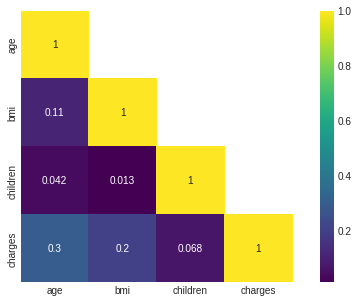

In [105]:
# Setelah menjawab kondisi-kondisi yang lebih mungkin memiliki tagihan kesehatan yang tinggi
# dari langkah sebelumnya. Kita juga dapat mencari keterhubungan antara kondisi-kondisi
# tersebut dengan tagihan kesehatan. Analisa korelasi akan diperlukan disini.

#Heatmap of variables to check correlation between variables
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,5)
sns.heatmap(corrMatt, mask=mask,cmap='viridis', square=True,annot=True)
plt.show()


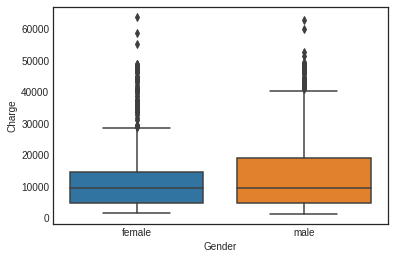

In [107]:
#korelasi Gender terhadap Charges

Gcor = sns.boxplot(x=df['sex'], y=df['charges'])
Gcor.set(xlabel='Gender', ylabel='Charge')
plt.show()



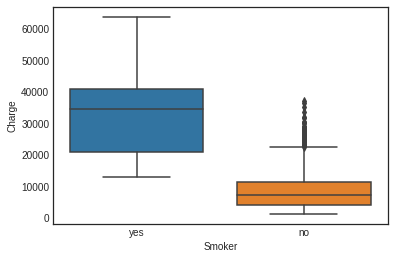

In [109]:
#korelasi Smoker terhadap Charges

Scor = sns.boxplot(x=df['smoker'], y=df['charges'])
Scor.set(xlabel='Smoker', ylabel='Charge')
plt.show()



In [110]:
covarians = df.cov()
print(covarians)

                   age           bmi    children       charges
age         197.401387      9.362337    0.719303  5.087480e+04
bmi           9.362337     37.187884    0.093795  1.464730e+04
children      0.719303      0.093795    1.453213  9.926742e+02
charges   50874.802298  14647.304426  992.674197  1.466524e+08


### Langkah 5 : Pengujianm Hipotesis

In [136]:
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import anderson

In [165]:
# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
rokok = np.array(df[df.smoker == 'yes'].charges) # perokok
nonrokok = np.array(df[df.smoker == 'no'].charges) # non perokok
#Gunakan Shapiro untuk uji normalitas
stat, pval = stats.shapiro(rokok)
stata, pvala = stats.shapiro(nonrokok)
print('Distribusi Normal perokok :  p-value: %.8f' % pval)
stata, pvala = stats.shapiro(nonrokok)
print('Distribusi Normal nonrokok :  p-value: %.8f' % pvala)
print('-'*50)
#Gunakan Bartlett's test for equality of variance
stat1, pval1 = stats.bartlett(rokok, nonrokok)
print(f"Nilai pval bartlet test adalah :{pval1:.8f}")

if pval1 < 0.05:
    print('Varians tidak sama untuk kedua sampel' % pval1)
else:
    print('Varians tidak sama untuk kedua sampel' % pval1)
print('-'*50)
#Gunakan Welcth test dengan equal_var = False
t_stat, p_value = stats.ttest_ind(rokok,nonrokok,equal_var='False')
print(f"t_stat : {t_stat:.8f}")
print(f"p_value : {p_value:.8f}")
if p_value < 0.05:  
    print(f'karena p_value **({p_value:.8f}) < 0.05**, maka Null Hypothesis ditolak. sehingga **Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok**')
else:
    print(f'karena p_value **({p_value:.8f}) > 0.05**, maka Null Hypothesis diterima. sehingga **Tagihan kesehatan perokok sama dengan tagihan kesehatan non perokok**')


Distribusi Normal perokok :  p-value: 0.00000000
Distribusi Normal nonrokok :  p-value: 0.00000000
--------------------------------------------------
Nilai pval bartlet test adalah :0.00000000
Varians tidak sama untuk kedua sampel
--------------------------------------------------
t_stat : 46.66492117
p_value : 0.00000000
karena p_value **(0.00000000) < 0.05**, maka Null Hypothesis ditolak. sehingga **Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok**


In [166]:
# Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
bmiup25 = np.array(data3d['charges']) # BMI di atas 25
bmiud25 = np.array(data3e['charges']) # BMI di baswah 25
#Gunakan Shapiro untuk uji normalitas
stat2, pval2 = stats.shapiro(bmiup25)
print('Distribusi Normal BMI di atas 25 :  p-value: %.8f' % pval2)
stat3, pval3 = stats.shapiro(bmiud25)
print('Distribusi Normal BMI di bawah 25 :  p-value: %.8f' % pval3)
print('-'*50)
#Gunakan Bartlett's test for equality of variance
stat4, pval4 = stats.bartlett(bmiup25, bmiud25)
print(pval4)
print(f"Nilai pval bartlet test adalah :{pval4:.8f}")
if pval4 < 0.05:
    print('Varians tidak sama untuk kedua sampel' % pval4)
else:
    print('Varians sama untuk kedua sampel' % pval4)
print('-'*50)
#Gunakan Welcth test dengan equal_var = False
t_stat2, p_value2 = stats.ttest_ind(bmiup25,bmiud25,equal_var='False')
print(f"t_stat : {t_stat2:.8f}")
print(f"p_value : {p_value2:.8f}")
if p_value2 < 0.05:  
    print(f'karena p_value **({p_value2:.8f}) < 0.05**, maka Null Hypothesis ditolak. sehingga **Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25**')
else:
    print(f'karena p_value **({p_value2:.8f}) > 0.05**, maka Null Hypothesis diterima. sehingga **Tagihan kesehatan dengan BMI diatas 25 sama dengan tagihan kesehatan dengan BMI dibawah 25**')


Distribusi Normal BMI di atas 25 :  p-value: 0.00000000
Distribusi Normal BMI di bawah 25 :  p-value: 0.00000000
--------------------------------------------------
9.962097161643153e-22
Nilai pval bartlet test adalah :0.00000000
Varians tidak sama untuk kedua sampel
--------------------------------------------------
t_stat : 4.31994691
p_value : 0.00001676
karena p_value **(0.00001676) < 0.05**, maka Null Hypothesis ditolak. sehingga **Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25**


In [167]:
# BMI laki-laki dan perempuan sama
bmicwe = df[df['sex'] == 'female']['bmi']
bmicwo = df[df['sex'] == 'male']['bmi']
#Gunakan Shapiro untuk uji normalitas
stat5, pval5 = stats.shapiro(bmicwe)
print('Distribusi Normal BMI di atas 25 :  p-value: %.8f' % pval5)
stat6, pval6 = stats.shapiro(bmicwo)
print('Distribusi Normal BMI di bawah 25 :  p-value: %.8f' % pval6)
print('-'*50)
#Gunakan Bartlett's test for equality of variance
stat7, pval7 = stats.bartlett(bmicwe, bmicwo)
print(f"Nilai pval bartlet test adalah :{pval7:.8f}")
if pval7 < 0.05:
    print('Varians tidak sama untuk kedua sampel' % pval7)
else:
    print('Varians sama untuk kedua sampel' % pval7)
print('-'*50)
#Gunakan t-test dengan equal_var = True
t_stat1, p_value1 = stats.ttest_ind(bmicwe,bmicwo,equal_var='True')
print(f"t_stat : {t_stat1:.8f}")
print(f"p_value : {p_value1:.8f}")
if p_value1 < 0.05:  
    print(f'karena p_value **({p_value:.8f}) < 0.05**, maka Null Hypothesis ditolak. sehingga **BMI laki-laki berbeda dengan BMI perempuan**')
else:
    print(f'karena p_value **({p_value:.8f}) > 0.05**, maka Null Hypothesis diterima. sehingga **BMI laki-laki sama dengan BMI perempuan**')



Distribusi Normal BMI di atas 25 :  p-value: 0.00354337
Distribusi Normal BMI di bawah 25 :  p-value: 0.00313064
--------------------------------------------------
Nilai pval bartlet test adalah :0.68895570
Varians sama untuk kedua sampel
--------------------------------------------------
t_stat : -1.69675264
p_value : 0.08997637
karena p_value **(0.00000000) > 0.05**, maka Null Hypothesis diterima. sehingga **BMI laki-laki sama dengan BMI perempuan**
